<a href="https://colab.research.google.com/github/DoLIF/skillfactory_rds/blob/master/%5Cmodule_3%5CUNICEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stud_math.xls to stud_math.xls


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['stud_math.xls']))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.

In [ ]:
def for_types (frame):
  for i in frame.columns:
    if df.loc[:, i].dtype == 'O':
      print("В колонке {} уникальных значений: {} \nЗначений, встретившихся в столбце более 30 раз: {}".format(i,df.loc[:,i].nunique(),(df.loc[:,i].value_counts()>30).sum()))
    elif df.loc[:, i].dtype == 'int64' or df.loc[:, i].dtype == 'float64':
      median = df.loc[:,i].median()
      IQR = df.loc[:,i].quantile(0.75) - df.loc[:,i].quantile(0.25)
      perc25 = df.loc[:,i].quantile(0.25)
      perc75 = df.loc[:,i].quantile(0.75)
      df.loc[:,i].loc[df.loc[:,i].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]


In [ ]:
for_types(df)

В колонке school уникальных значений: 2 
Значений, встретившихся в столбце более 30 раз: 2
В колонке sex уникальных значений: 2 
Значений, встретившихся в столбце более 30 раз: 2
В колонке address уникальных значений: 2 
Значений, встретившихся в столбце более 30 раз: 2
В колонке famsize уникальных значений: 2 
Значений, встретившихся в столбце более 30 раз: 2
В колонке Pstatus уникальных значений: 2 
Значений, встретившихся в столбце более 30 раз: 2
В колонке Mjob уникальных значений: 5 
Значений, встретившихся в столбце более 30 раз: 5
В колонке Fjob уникальных значений: 5 
Значений, встретившихся в столбце более 30 раз: 2
В колонке reason уникальных значений: 4 
Значений, встретившихся в столбце более 30 раз: 4
В колонке guardian уникальных значений: 3 
Значений, встретившихся в столбце более 30 раз: 2
В колонке schoolsup уникальных значений: 2 
Значений, встретившихся в столбце более 30 раз: 2
В колонке famsup уникальных значений: 2 
Значений, встретившихся в столбце более 30 раз: 

In [ ]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Выводы из корреляций:

Видно, что studytime и studytime, granular один из столбцов можно удалить

Сильнее всего на количество баллов влияет: Образование Матери (Medu), Количество внеучебных неудач (failures) и Время на доп занятия (studytime) - ожидаемо

Так же видно, что образование Матери сильнее влияет на результат, чем образование отца. Гипотеза в том, что матерей домохозяек больше чем отцов и они создают этот дисбаланс.

Образование родителей так же влияет на Количество внеучебных неудач (failures),что показывает сильное косвенное влияние на результат ЕГЭ (Score)

На Время на доп занятия (studytime) оказывает негативное влияние Количество внеучебных неудач (failures), что косвенно показывает важность Образования родителей.




In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [ ]:
df.drop(['studytime, granular'], inplace = True, axis = 1)

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

У нас есть 17 номинативных переменных, их колличество варируется от 2 до 6

Создадим список номинативных переменных

In [ ]:
str_column = []
for i in df.columns:
    if df.loc[:, i].dtype == 'O':
      str_column.append(i)
str_column

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

И функцию для отрисовки диаграммы размаха

In [ ]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:(df.loc[:, column].value_counts()>30).sum()])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

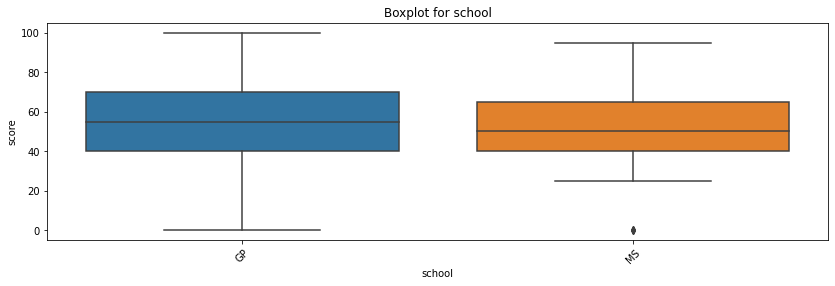

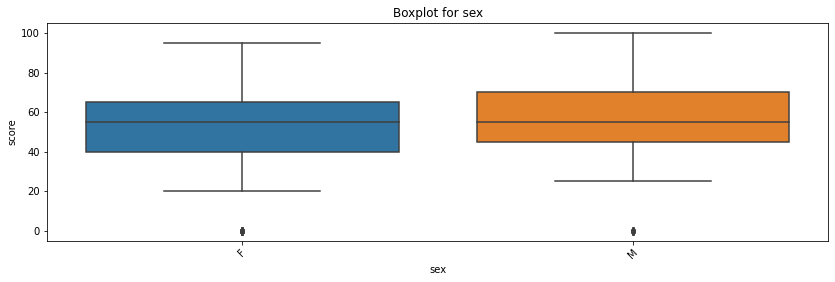

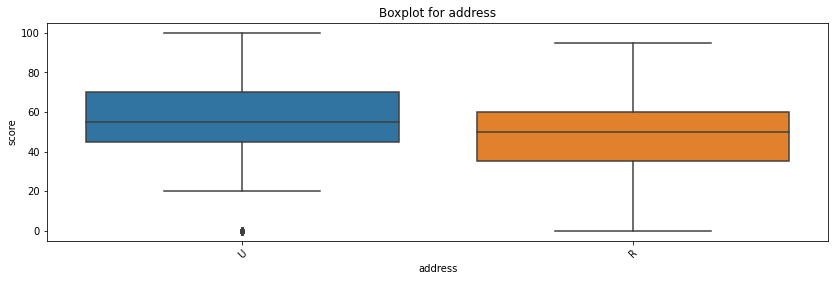

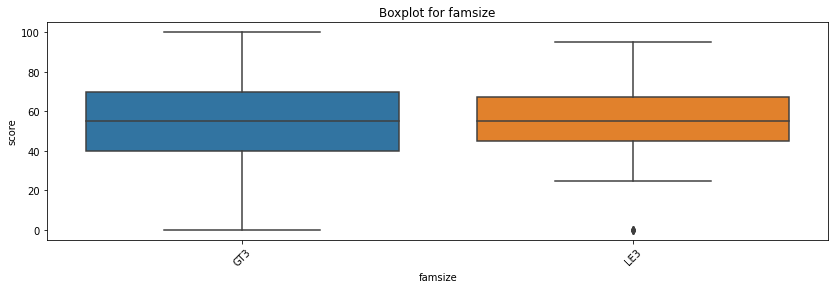

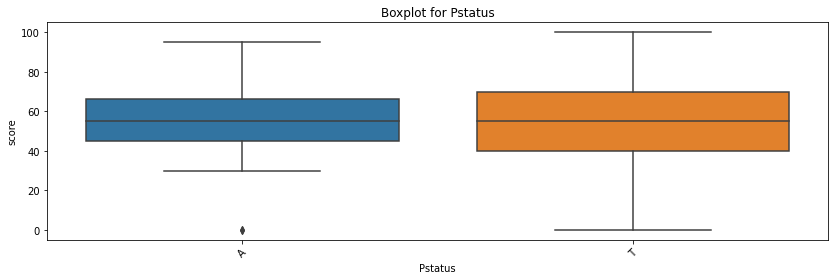

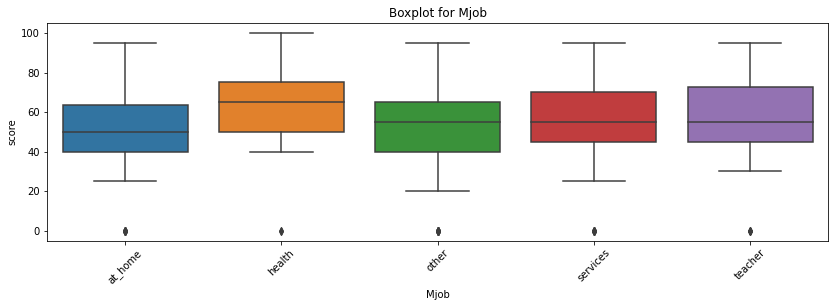

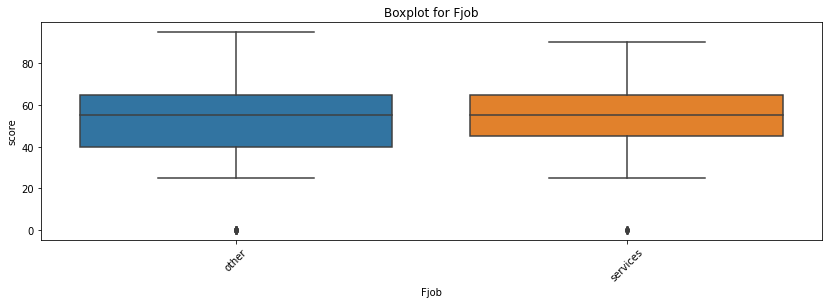

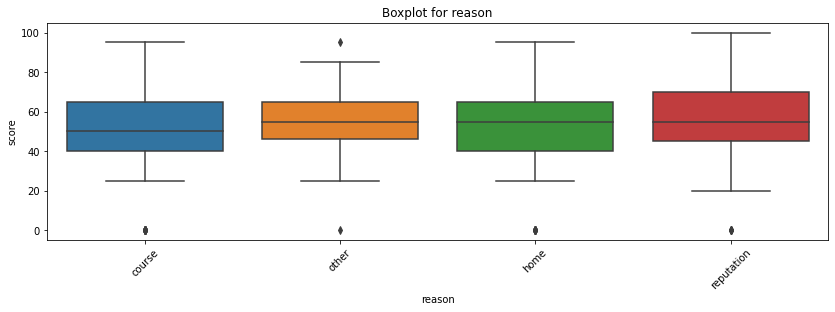

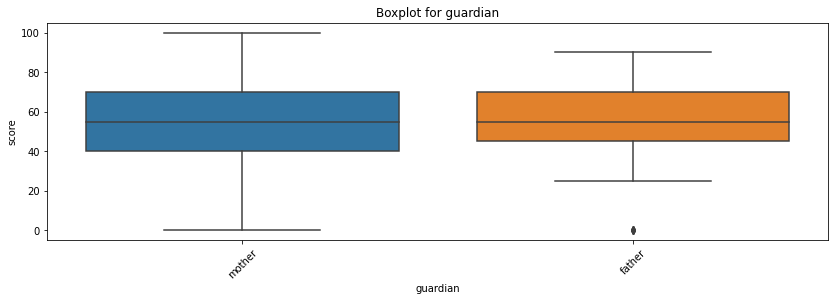

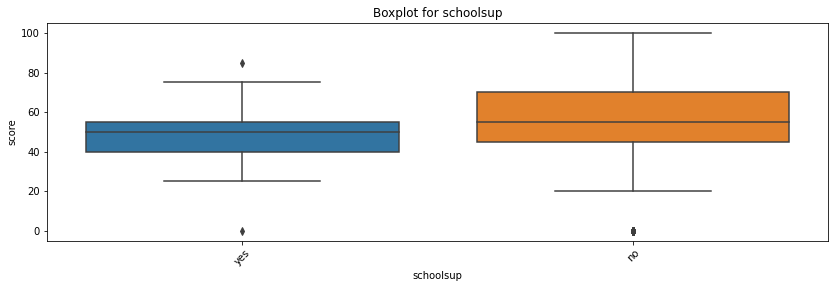

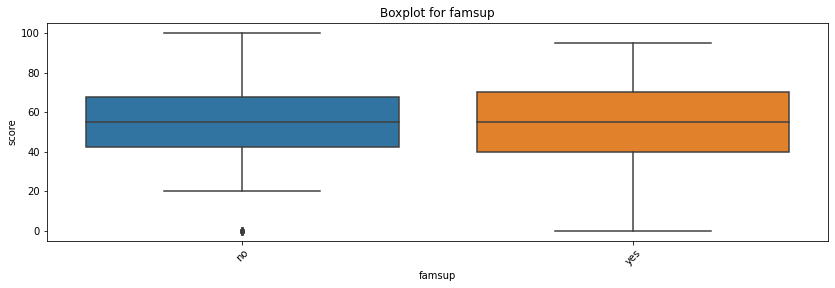

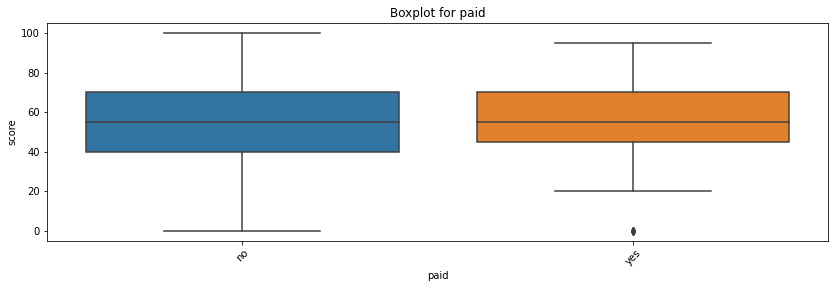

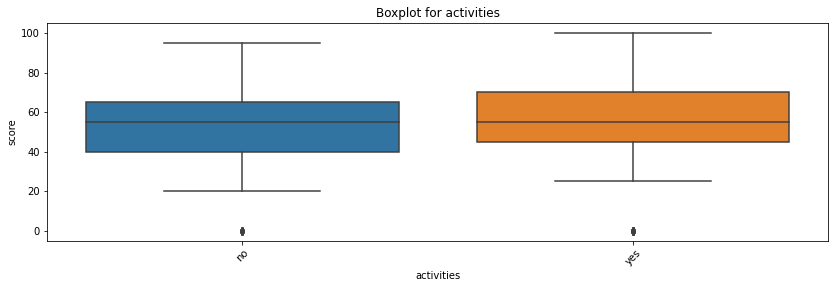

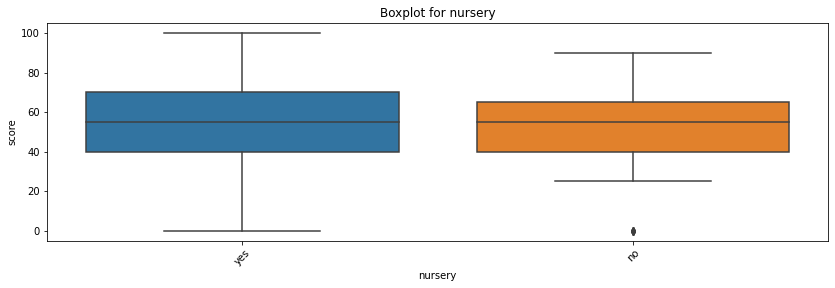

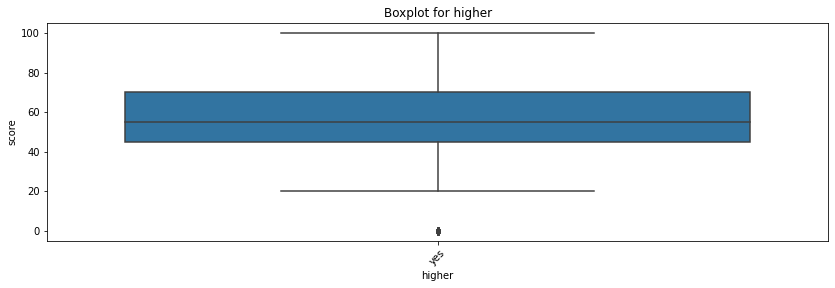

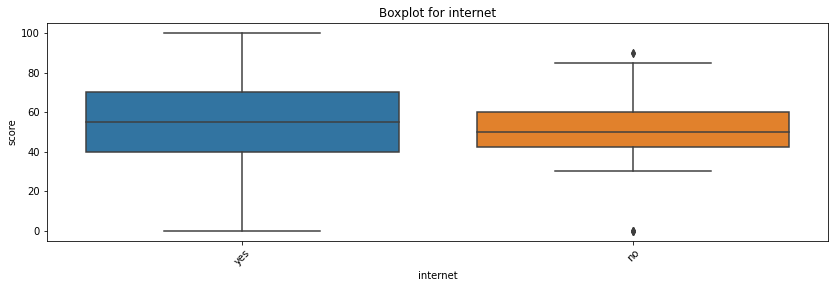

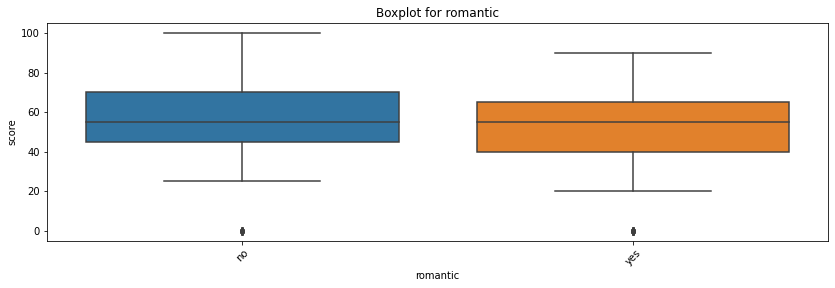

In [ ]:
for col in str_column:
  get_boxplot(col)

Мы видим отличия в средних результатах показаниях по следующим показателям: 
School (GP > MS), address (U>R),MJob (Health >> others), Schoolsup (No > Yes) Internet (Yes > No)

Проведём оценку с помощью теста Стьюдента. За 0 гипотезу примем, то что параметры имеют одинаковый вес на результат ЕГЭ

In [ ]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:(df.loc[:, column].value_counts()>30).sum()]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [ ]:
for col in str_column:
  get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


 в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку score, это: Mjob, Medu, failures и studytime

In [ ]:
df_for_model = df.loc[:, ['Mjob', 'Medu', 'failures', 'studytime', 'score']]
df_for_model.head()

,Mjob,Medu,failures,studytime,score
0,at_home,4.0,0.0,2.0,30.0
1,at_home,1.0,0.0,2.0,30.0
2,at_home,1.0,3.0,2.0,50.0
3,health,4.0,0.0,3.0,75.0
4,other,3.0,0.0,2.0,50.0


Итак, время итогов:

1) Сильнее всего на оценку оказывает влияние мама. А именно её образование и работа. Образование отцов оказывает примероно в 3 раза меньшее влияние.

2) Малое колличество  групп  номинативных переменных делает логичным отсечение значений с менее 30 повторами (статистически не значимых)

3) Параметрами, которые оказывают наибольшее влияние на оценку по ЕГЭ оказались Mjob, Medu, failures и studytime

4) Анализ корреляций показывает зависимость failures и studytime от Medu

5) Видно, что с возрастом, оценка по ЕГЭ ухудшается. Это, возможно связано, с тем, что стдающий тест начинает проводить больше времени с друзьями (пряма корреляция с goout) и тратит меньше времени на подготовку (Обратная корреляция со studytime)